# Телеком — Поиск клиента с неоптимальными тарифами

# Описание проекта

Клиентами «Нупозвони» являются организации, которым нужно
распределять множество входящих вызовов на различных операторов, либо
осуществлять исходящие вызовы силами операторов. Также операторы могут
осуществлять внутренние вызовы, то есть вызовы друг между другом, которые
осуществляются внутри сети виртуальной телефонии. Предусмотренны разные виды тарификации для клиетов:


1. Ежемесячная плата за тариф:


- Тариф А — 4000 ₽,
- Тариф B — 2000 ₽,
- Тариф С — 1000 ₽.


2. Входящие звонки — бесплатны на всех тарифах,


3. Исходящие звонки внутри сети, включённые в тариф:

- Тариф А — 2000 минут,
- Тариф B — 500 минут,
- Тариф С — нет.


4. Цена сверх лимита:

- A — 0.1 ₽/мин.,
- B — 0.15 ₽/мин.,
- C — 0.3 ₽/мин.


5. Исходящие звонки, кроме внутренних:

- A — 0.3 ₽/мин.,
- B — 0.5 ₽/мин.,
- C — 0.7 ₽/мин.


6. За каждого оператора клиент платит дополнительно к стоимости тарифа и цене
звонков в месяц:


- Тариф А — 50 ₽,
- Тариф B — 150 ₽,
- Тариф С — 300 ₽.


Для провеления анализа у нас имеется 2 датасета:

Датасет telecom_dataset


Путь к файлу: /datasets/telecom_dataset.csv


Колонки:
- user_id — идентификатор клиента;
- date — дата статистики;
- direction — направление вызовов: out — исходящий вызов, in — входящий;
- internal — маркер внутренних и внешних вызовов;
- operator_id — идентификатор оператора;
- is_missed_call — маркер пропущенных вызовов;
- calls_count — количество звонков;
- call_duration — длительность всех звонков без учёта времени ожидания;
- total_call_duration — длительность всех звонков с учётом времени ожидания.


Датасет telecom_clients


Путь к файлу: /datasets/telecom_clients.csv


Колонки:
- user_id — идентификатор клиента;
- tariff_plan — тарифный план клиента;
- date_start — дата регистрации клиента в сервисе.

# Цели и задачи.


Основной целью проекта является изучение изменения выручки компании при переходе клиентов на выгодные для них тарифы за последние 3 месяца. Так же необходимо решить ряд вопросов:
1. Как не потерять выручку при оптимизации тарифа
2. Как не потерять активных клиентов и перевести их на оптимальные тарифы
3. Как увеличить выручку

Задачами проекта является: 
- определение активных клиентов;
- найти клиентов, которые неоптимально используют свои тарифные планы;
- рассчитать текущую выручку компании;
- изучить выручку после перевода активных клиентов на оптимальные тарифы.



# Предобработка данных

- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему
- Обработайте пропуски при необходимости
- Исследуйте дубликаты

# Исследовательский анализ данных

1. Определить активных клиентов
2. Найти активных клиентов, которые неоптимально используют свои тарифные планы:
- меньше всего звонят или не звонят вне сети
- получают только входящие звонки
- доплачивают сверх тарифа за минуты внутри сети
- звонят вне сети
3. Средняя длительность звонка без учёта времени ожидания по каждому клиенту
4. Проверить количество внутренних и внешних вызовов на каждого оператора
5. Проверить количества вызовов по дням
6. Посмотреть распределение соотношения количества входящих и исходящих вызовов
7. Рассчитать текущую выручку компании
8. Изучить выручку после перевода активных клиентов на оптимальные тарифы

# Гипотезы

1. 

- 0 гипотеза: Средняя выручка активных клиетов не равна средней выручке после оптимизации
- альтернативная гипотиза: Средняя выручка активных клиетов равна средней выручке после оптимизации
 
 
2. 
- 0 гипотеза: Средняя выручка активных клиетов выше средней выручке неактичных клиентов
- альтернативная гипотиза: Средняя выручка активных клиетов равна средней выручке неактичных клиентов

# Выводы

Необходимо подвести итоги исследования и ответить на вопросы:

- как уменьшить риск падения выручки, если все клиенты перейдут на более выгодные тарифы?

По итогам исследования подготовьте презентацию и дашборд. Необходимо выбрать один из наборов:


Набор №1


1. Постройте гистограмму распределения длительности звонков
2. Постройте круговую диаграмму, отображающую соотношение кол-ва внутренних и внешних вызовов
3. Добавьте фильтр дашборда по направлению вызовов


Набор №2

1. Постройте диаграмму количества вызовов по дням
2. Постройте круговую диаграмму, отображающую соотношение кол-ва входящих и исходящих вызовов
3. Добавьте фильтр дашборда по типу вызова (внешний или внутренний)

# Предобработка данных


Импортируем библиоте и откроем таблицы

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import scipy.stats as st
import math as mth
import plotly.express as px 
import seaborn as sns
from plotly import graph_objects as go


In [2]:
dataset = pd.read_csv('/datasets/telecom_dataset.csv')
dataset. head(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [3]:
clients = pd.read_csv('/datasets/telecom_clients.csv')
clients.head(5)

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


Необходимо поменять типы данных в столбцах: date, internal и operator_id 

In [5]:
dataset['date']=pd.DatetimeIndex(dataset['date']).date
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d')
dataset.head(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04,in,False,NaN,True,2,0,4
1,166377,2019-08-05,out,True,880022.0,True,3,0,5
2,166377,2019-08-05,out,True,880020.0,True,1,0,1
3,166377,2019-08-05,out,True,880020.0,False,1,10,18
4,166377,2019-08-05,out,False,880022.0,True,3,0,25


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53902 non-null  int64         
 1   date                 53902 non-null  datetime64[ns]
 2   direction            53902 non-null  object        
 3   internal             53785 non-null  object        
 4   operator_id          45730 non-null  float64       
 5   is_missed_call       53902 non-null  bool          
 6   calls_count          53902 non-null  int64         
 7   call_duration        53902 non-null  int64         
 8   total_call_duration  53902 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 3.3+ MB


In [7]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


В таблице clients надо заменить тип данных только в date_start

In [8]:
clients['date_start'] = pd.to_datetime(clients['date_start'], format='%Y-%m-%d')
clients.head(5)

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [9]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


В столбцах internal и operator_id есть пропуски, необходимо их изучить, а только потом менять тим данных

In [10]:
dataset.isnull().sum()

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

В internal немного пропусков, можни их удалить и изменить тип данных на bool, но перед этим проверим "природу" пропусков.

In [11]:
internal_isna = dataset[dataset['internal'].isna()]
internal_isna

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
1007,166405,2019-09-18,in,NaN,NaN,True,1,0,59
1090,166405,2019-10-01,in,NaN,NaN,True,1,0,1
1864,166406,2019-08-20,in,NaN,NaN,True,1,0,36
1924,166406,2019-09-02,in,NaN,879898.0,False,1,2,9
6210,166541,2019-09-26,in,NaN,908960.0,False,1,393,423
...,...,...,...,...,...,...,...,...,...
52462,168361,2019-11-09,in,NaN,NaN,True,6,0,14
52590,168361,2019-11-13,in,NaN,NaN,True,2,0,6
52621,168361,2019-11-14,in,NaN,NaN,True,1,0,2
53717,168579,2019-11-09,in,NaN,NaN,True,1,0,18


In [12]:
internal_isna.groupby(['direction', 'is_missed_call']).\
                   agg({'user_id' : 'count', 'call_duration' : 'sum','total_call_duration' : 'sum'})


user_id  call_duration  total_call_duration
direction is_missed_call                                             
in        False                59           7100                 8166
          True                 56             85                  918
out       True                  2              0                  289

Видим, что 115 звонков - входящие и половина из них пропущеных, в дальейщем нам эти данные не приголятся, т.к. они никак не будут влиять на стоимость звонков, ведь входящие звонки бемплатны. Еще 2 звонка исходящие, но они пропущенные и особой значимости для нас так же не имеют.

In [13]:
dataset = dataset.dropna(subset = ['internal'])
dataset['internal'].isnull().sum()

0

In [14]:
dataset['internal'] = dataset['internal'].astype('bool')

У столбца operator_id очень много пропусков, необходимо понять их "природу" перед тем как обработать их.

In [15]:
operator_id_nan = dataset[dataset.isnull().any(axis=1)]
operator_id_nan.head(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04,in,False,NaN,True,2,0,4
7,166377,2019-08-05,in,False,NaN,True,6,0,35
9,166377,2019-08-06,in,False,NaN,True,4,0,62
17,166377,2019-08-07,in,False,NaN,True,2,0,24
27,166377,2019-08-12,in,False,NaN,True,2,0,34


In [16]:
operator_id_nan.groupby(['direction', 'is_missed_call']).agg({'user_id' : 'count'})

user_id
direction is_missed_call         
in        False                73
          True               7844
out       False                49
          True                149

По таблице видно, что большинтво звонков с неопределенным оператором входящие и являются пропущенными. Можно сделать вывод, что клиенты не дозвонились до нужного им оператора. Есть небольшое количество неопределенных операторов на входящих звонках, по которым получились дозвоны и 198 исходящих звонков. Скорей всего, произошел сбой и номера операторов не смогли зафиксироваться. Эти пропущенные данные нам никак не помешают, удалять их не целесообрано, оставим как есть.



In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53785 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53785 non-null  int64         
 1   date                 53785 non-null  datetime64[ns]
 2   direction            53785 non-null  object        
 3   internal             53785 non-null  bool          
 4   operator_id          45670 non-null  float64       
 5   is_missed_call       53785 non-null  bool          
 6   calls_count          53785 non-null  int64         
 7   call_duration        53785 non-null  int64         
 8   total_call_duration  53785 non-null  int64         
dtypes: bool(2), datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 3.4+ MB


In [18]:
clients.isnull().sum()

user_id        0
tariff_plan    0
date_start     0
dtype: int64

У таблицы с клиентами и тарифами пропущенных значений нет

Проверим таблицы на дубликаты

In [19]:
dataset.duplicated().sum()

4893

Дубликатов очень много, но они являются полными дубликатами. К сожалению, с ними придется расстаться. 

In [20]:
dataset = dataset.drop_duplicates().reset_index(drop= True)
dataset.duplicated().sum()

0

In [21]:
# ячейка тимлида: подгрузим данные
tmp = pd.read_csv('https://code.s3.yandex.net/datasets/telecom_dataset.csv')

# посмотрим на особенности данных, содержащие дубликаты:
(tmp[tmp.duplicated() == True] # оставляем только дубликаты
 .groupby(['is_missed_call','direction','internal']) # группируем по важным признакам
 .agg({'user_id':'nunique','calls_count':'sum','total_call_duration':'sum'}) # подсчитываем ключевые метрики
 .assign(calls_share = lambda x: x['calls_count'] / tmp[tmp.duplicated() == True].calls_count.sum()) # смотрим на доли
)

user_id  calls_count  total_call_duration  \
is_missed_call direction internal                                              
False          in        False         200         9831              1147031   
                         True           14           41                 2577   
               out       False         162        33110              3731852   
                         True           34          672                50826   
True           in        False         209         9060               103820   
                         True           21           77                 1318   
               out       False         148        26803               656727   
                         True           60          443                 3598   

                                   calls_share  
is_missed_call direction internal               
False          in        False        0.122817  
                         True         0.000512  
               out       False        0.413637  
                         True         0.008395  
True           in        False        0.113185  
                         True         0.000962  
               out       False        0.334845  
                         True         0.005534

In [22]:
# ячейка тимлида

# посмотрим на особенности данных, если удалим дубликаты:
(tmp[tmp.duplicated() != True]
 .groupby(['is_missed_call','direction','internal'])
 .agg({'user_id':'nunique','calls_count':'sum','total_call_duration':'sum'})
 .assign(calls_share = lambda x: x['calls_count'] / tmp[tmp.duplicated() != True].calls_count.sum())
)

user_id  calls_count  total_call_duration  \
is_missed_call direction internal                                              
False          in        False         273        92786             10975841   
                         True           47          677                58125   
               out       False         209       329306             37470202   
                         True           83         7963               591475   
True           in        False         303       103219              1280794   
                         True           76          944                19315   
               out       False         214       266518              6223935   
                         True          140         5071                44990   

                                   calls_share  
is_missed_call direction internal               
False          in        False        0.115018  
                         True         0.000839  
               out       False        0.408209  
                         True         0.009871  
True           in        False        0.127951  
                         True         0.001170  
               out       False        0.330377  
                         True         0.006286

In [23]:
clients.duplicated().sum()

0

В таблице с клиентами дубликатов нет

Вывод:

При предобработке данных были изменены типы данных в столбцах: date, internal и operator_id. В таблице clients необходимо было заменить тип данных только в date_start. 

У столбца operator_id очень много пропусков, необходимо было понять их "природу". Было выявлено, что большинтво звонков с неопределенным оператором входящие и являются пропущенными. Можно сделать вывод, что клиенты не дозвонились до нужного им оператора. Есть небольшое количество неопределенных операторов на входящих звонках, по которым получились дозвоны и 198 исходящих звонков. Скорей всего, произошел сбой и номера операторов не смогли зафиксироваться.
Исходя из этого, заменила все пропуски в operator_id на 0.

Была произведена проверка на дубликаты. В таблице dataset было найдено 4893 полных дубликатов, которых пришлось удалить.




# Исследовательский анализ данных

## Определить активных клиентов

Чтобы определить активных клиентов, нам нужно выявить тех операторов, которые имели 10 и больше рабочих дней в последнем месяце.

Сначала определим за какой период у нас предоставлены данные и объединим 2 датасета в 1.

In [24]:
print('Дата начала периода', dataset['date'].min())
print('Дата окончания периода', dataset['date'].max())

Дата начала периода 2019-08-02 00:00:00
Дата окончания периода 2019-11-28 00:00:00


In [25]:
dataset_telecom = dataset.merge(clients, on='user_id', how='left')
dataset_telecom.head(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
0,166377,2019-08-04,in,False,NaN,True,2,0,4,B,2019-08-01
1,166377,2019-08-05,out,True,880022.0,True,3,0,5,B,2019-08-01
2,166377,2019-08-05,out,True,880020.0,True,1,0,1,B,2019-08-01
3,166377,2019-08-05,out,True,880020.0,False,1,10,18,B,2019-08-01
4,166377,2019-08-05,out,False,880022.0,True,3,0,25,B,2019-08-01


Видим, что дата окончания исследуемого периода 2019-11-28. Значит, активными клиентами будем считать тех, кто работал последний месяц 2019-11. Для этого сделаем еще один столбец с месяцами.

Посчитаем сколько клиентов у нас представлено в датасете.

In [26]:
user_id_count = dataset_telecom['user_id'].nunique()
print('Во всем датасете представлено', user_id_count,'клиентов') 

Во всем датасете представлено 307 клиентов


In [27]:
dataset_telecom['month'] = pd.DatetimeIndex(dataset_telecom['date']).month 
dataset_telecom.head(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,month
0,166377,2019-08-04,in,False,NaN,True,2,0,4,B,2019-08-01,8
1,166377,2019-08-05,out,True,880022.0,True,3,0,5,B,2019-08-01,8
2,166377,2019-08-05,out,True,880020.0,True,1,0,1,B,2019-08-01,8
3,166377,2019-08-05,out,True,880020.0,False,1,10,18,B,2019-08-01,8
4,166377,2019-08-05,out,False,880022.0,True,3,0,25,B,2019-08-01,8


Т.к. нам надо получить итоги по клиентам за последние 3 месяца, оставим в таблице только 3 месяца для дальнейших расчетов

In [28]:
activ = dataset_telecom.query('month != 8')
activ.head(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,month
107,166377,2019-09-02,in,False,880028.0,False,2,66,75,B,2019-08-01,9
108,166377,2019-09-02,in,False,880026.0,False,1,31,34,B,2019-08-01,9
109,166377,2019-09-02,out,False,880026.0,False,16,1853,1983,B,2019-08-01,9
110,166377,2019-09-02,out,False,880026.0,True,6,0,168,B,2019-08-01,9
111,166377,2019-09-02,out,False,880028.0,False,20,2529,2687,B,2019-08-01,9


In [29]:
act_us = activ.groupby('month').agg({'user_id':'nunique'}).sort_values(by='month', ascending=True).reset_index()
act_us

,month,user_id
0,9,173
1,10,273
2,11,261


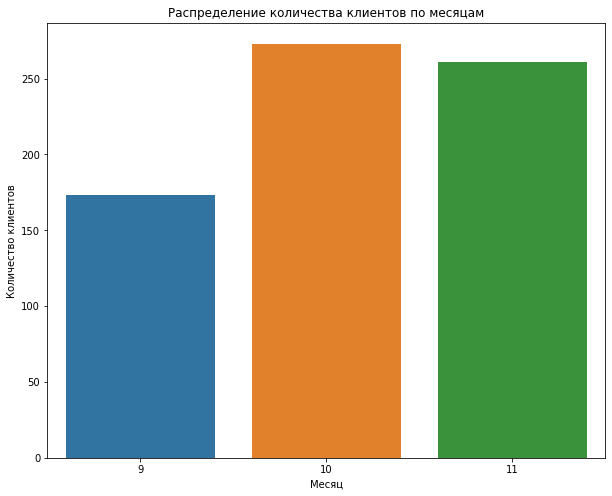

In [30]:
plt.figure(figsize=(10, 8)) 
ax = sns.barplot(x='month', y='user_id', data = act_us)
ax.set_title('Распределение количества клиентов по месяцам')
ax.set_xlabel('Месяц') 
ax.set_ylabel('Количество клиентов')
plt.show()

По графику видим, что большинство клиентов работато в октябре 2019, но являются ли они активными, необходимо проверить.

Вывод:

Нами было выявлено, что период начала выборки 2019-08-02 и период окончания 2019-11-28, но активными клиентами будем считать тех, кто работал 10 и более рабочих дней в последний месяц 2019-11 и уменьшим период выборки до 3х месяцев, т.е будем рассматривать период с 2019-09 по 2019-08.

## Найти активных клиентов, которые неоптимально используют свои тарифные планы:

- меньше всего звонят или не звонят вне сети
- получают только входящие звонки
- доплачивают сверх тарифа за минуты внутри сети
- звонят вне сети

Посмотрим клиентов, которые меньше всего звонят

Посмотрим распределение количества звонков операторами c сентября по ноябрь 2019

In [31]:
co = activ.groupby(['calls_count']).agg({'operator_id': 'nunique'})\
.sort_values(by='calls_count', ascending=True).reset_index().rename(columns={'operator_id': 'count_operator'})
co.head(5)

,calls_count,count_operator
0,1,959
1,2,756
2,3,626
3,4,545
4,5,474


<function matplotlib.pyplot.show(close=None, block=None)>

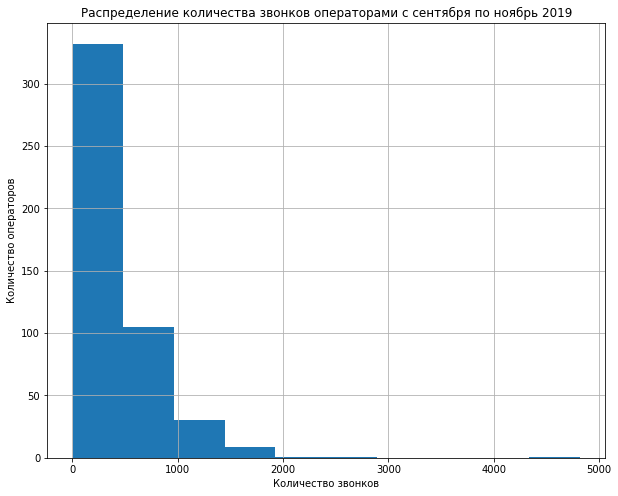

In [32]:
co['calls_count'].hist(bins=10,figsize=(10, 8))\
.set(title='Распределение количества звонков операторами c сентября по ноябрь 2019', xlabel='Количество звонков', ylabel='Количество операторов')
plt.show

In [33]:
co.describe()

,calls_count,count_operator
count,479.000000,479.000000
mean,399.409186,25.686848
std,428.299610,85.019897
min,1.000000,0.000000
25%,120.500000,1.000000
50%,275.000000,1.000000
75%,550.000000,8.000000
max,4817.000000,959.000000


С сентября по ноябрь 2019 было сделано от 1 до 4817 звонков. В среднем за 3 месяца операторы звонили и получали всего 399 звонков. Среди операторов есть трудоголики, звонят более 1000 раз. На графике видим выброс в количестве 4817 звонков, либо очень надо было сделать план по обзвонам, либо кто-то подключил робота на помощь сотрудникам, либо это ошибка))

Составим табличку с тарифами и внедрим ее в таблицу с активными клиентами, чтобы вычислить стоимость оплаты за каждого оператора.

In [34]:
tariffics = pd.DataFrame({'tariff_plan': ['A', 'B', 'C'], 'cost': [4000, 2000, 1000], 'cost_within_call_over(р/мин)': [0.1, 0.15, 0.3], 
                     'cost_external_calls(р/мин)': [0.3, 0.5, 0.7], 'operator_cost': [50, 150, 300], 'within_call_free(min)': [2000, 500, 0]})
tariffics



,tariff_plan,cost,cost_within_call_over(р/мин),cost_external_calls(р/мин),operator_cost,within_call_free(min)
0,A,4000,0.10,0.3,50,2000
1,B,2000,0.15,0.5,150,500
2,C,1000,0.30,0.7,300,0


In [35]:
activ = activ.merge(tariffics, on='tariff_plan', how='left')
activ.head(5) 

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,month,cost,cost_within_call_over(р/мин),cost_external_calls(р/мин),operator_cost,within_call_free(min)
0,166377,2019-09-02,in,False,880028.0,False,2,66,75,B,2019-08-01,9,2000,0.15,0.5,150,500
1,166377,2019-09-02,in,False,880026.0,False,1,31,34,B,2019-08-01,9,2000,0.15,0.5,150,500
2,166377,2019-09-02,out,False,880026.0,False,16,1853,1983,B,2019-08-01,9,2000,0.15,0.5,150,500
3,166377,2019-09-02,out,False,880026.0,True,6,0,168,B,2019-08-01,9,2000,0.15,0.5,150,500
4,166377,2019-09-02,out,False,880028.0,False,20,2529,2687,B,2019-08-01,9,2000,0.15,0.5,150,500


Посмотрим, к каким тарифным планам относятся клиенты

In [36]:
tu = activ.groupby(['tariff_plan']).agg({'user_id' : 'nunique'}).reset_index()
tu

,tariff_plan,user_id
0,A,34
1,B,110
2,C,159


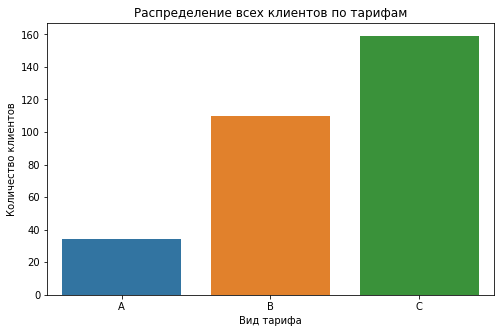

In [37]:
plt.figure(figsize=(8, 5))
sns.barplot(data=tu, x='tariff_plan', y='user_id')\
.set(title='Распределение всех клиентов по тарифам', xlabel='Вид тарифа', ylabel='Количество клиентов')
plt.show()

Больше всего клиентов подключено к тарифу С - 159 компаний, к тарифу В чуть меньше - 110 компаний, самым не попуоярным является тариф А - 34 компании. Возможно такое распредение связано с абонентской платой и с вхолящими в стоимость только внутренними звонками, которыми пользуются в основном только опетаторы при переговорах между собой и клиентам невыгодно платить (по их мнению) еще и за эти звонки. Ну что ж, необходимо это проверить.  

Посмотрим распределение клиентов по тарифам за 3 месяца

In [38]:
tum = activ.groupby(['tariff_plan', 'month']).agg({'user_id' : 'nunique'}).reset_index()
tum.head(5)

,tariff_plan,month,user_id
0,A,9,19
1,A,10,33
2,A,11,30
3,B,9,66
4,B,10,92


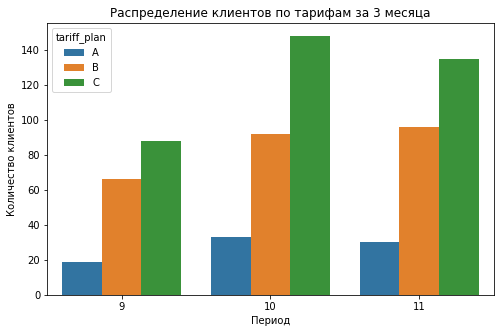

In [39]:
plt.figure(figsize=(8, 5))
sns.barplot(x='month', y='user_id', hue='tariff_plan', data=tum)\
.set(title='Распределение клиентов по тарифам за 3 месяца', xlabel='Период', ylabel='Количество клиентов')
plt.show()

По графикам видим, что больше всего клиентов подключено к тарифу С. Тариф В по количеству клиентов на 2м месте, тариф А пользуется малой популярность.

Переведем call_duration и total_call_duration в минуты для удобства рассчетов

In [40]:
activ['call_duration'] = round(activ['call_duration'] / 60, 2)
activ['total_call_duration'] = round(activ['total_call_duration'] / 60, 2)
activ.head(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,month,cost,cost_within_call_over(р/мин),cost_external_calls(р/мин),operator_cost,within_call_free(min)
0,166377,2019-09-02,in,False,880028.0,False,2,1.10,1.25,B,2019-08-01,9,2000,0.15,0.5,150,500
1,166377,2019-09-02,in,False,880026.0,False,1,0.52,0.57,B,2019-08-01,9,2000,0.15,0.5,150,500
2,166377,2019-09-02,out,False,880026.0,False,16,30.88,33.05,B,2019-08-01,9,2000,0.15,0.5,150,500
3,166377,2019-09-02,out,False,880026.0,True,6,0.00,2.80,B,2019-08-01,9,2000,0.15,0.5,150,500
4,166377,2019-09-02,out,False,880028.0,False,20,42.15,44.78,B,2019-08-01,9,2000,0.15,0.5,150,500


Посчитаем сколько тратят клиенты на своих операторов 

Добавим 3 новых столбца: 


* min_over_limit - показывает сколько минут было израсходовано сверх лимита тарифа внутри сети
* external_calls - сколько минут было израсходовано на разговоры вне сети
* operator_count - количество уникальных операторов 

Из полученных данных можем высчитать какая сумма переплаты. 

In [41]:
operator_count = activ.groupby('user_id').agg({'operator_id': 'nunique'}).reset_index()
activ = activ.merge(operator_count, on='user_id', how='left') 
activ = activ.rename(columns={'operator_id_x':'operator_id','operator_id_y':'operator_count'}) # количество уникальных операторов

In [42]:
over_limit = ((activ['is_missed_call']==False) & (activ['internal']==True)\
              & (activ[activ['tariff_plan'] =='C']['call_duration']>0))
over_limit01 = ((activ['is_missed_call']==False) & (activ['internal']==True)\
              & (activ[activ['tariff_plan'] == 'A']['call_duration']<2000))
over_limit1 = ((activ['is_missed_call']==False) & (activ['internal']==True)\
              & (activ[activ['tariff_plan'] == 'A']['call_duration']>2000))
over_limit2 = ((activ['is_missed_call']==False) & (activ['internal']==True)\
              & (activ[activ['tariff_plan'] == 'B']['call_duration']>500))
over_limit02 = ((activ['is_missed_call']==False) & (activ['internal']==True)\
              & (activ[activ['tariff_plan'] == 'B']['call_duration']<500))
activ.loc[over_limit, 'min_over_limit'] = activ['call_duration']  
activ.loc[over_limit01, 'min_over_limit'] = 0
activ.loc[over_limit02, 'min_over_limit'] = 0
activ.loc[over_limit1, 'min_over_limit'] = activ['call_duration'] - 2000
activ.loc[over_limit2, 'min_over_limit'] = activ['call_duration'] - 500
activ['min_over_limit'] = activ['min_over_limit'].fillna(0) # израсходованные минуты сверх лимита тарифа внутри сети 
activ.head(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,month,cost,cost_within_call_over(р/мин),cost_external_calls(р/мин),operator_cost,within_call_free(min),operator_count,min_over_limit
0,166377,2019-09-02,in,False,880028.0,False,2,1.10,1.25,B,2019-08-01,9,2000,0.15,0.5,150,500,5,0.0
1,166377,2019-09-02,in,False,880026.0,False,1,0.52,0.57,B,2019-08-01,9,2000,0.15,0.5,150,500,5,0.0
2,166377,2019-09-02,out,False,880026.0,False,16,30.88,33.05,B,2019-08-01,9,2000,0.15,0.5,150,500,5,0.0
3,166377,2019-09-02,out,False,880026.0,True,6,0.00,2.80,B,2019-08-01,9,2000,0.15,0.5,150,500,5,0.0
4,166377,2019-09-02,out,False,880028.0,False,20,42.15,44.78,B,2019-08-01,9,2000,0.15,0.5,150,500,5,0.0


In [43]:
external_calls = ((activ['is_missed_call']==False) & (activ['internal']==False))
activ.loc[external_calls, 'min_external'] = activ['call_duration']   
activ['min_external'] = activ['min_external'].fillna(0) # израсходованные минуты за разговоры вне сети
activ.head(5)


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,month,cost,cost_within_call_over(р/мин),cost_external_calls(р/мин),operator_cost,within_call_free(min),operator_count,min_over_limit,min_external
0,166377,2019-09-02,in,False,880028.0,False,2,1.10,1.25,B,2019-08-01,9,2000,0.15,0.5,150,500,5,0.0,1.10
1,166377,2019-09-02,in,False,880026.0,False,1,0.52,0.57,B,2019-08-01,9,2000,0.15,0.5,150,500,5,0.0,0.52
2,166377,2019-09-02,out,False,880026.0,False,16,30.88,33.05,B,2019-08-01,9,2000,0.15,0.5,150,500,5,0.0,30.88
3,166377,2019-09-02,out,False,880026.0,True,6,0.00,2.80,B,2019-08-01,9,2000,0.15,0.5,150,500,5,0.0,0.00
4,166377,2019-09-02,out,False,880028.0,False,20,42.15,44.78,B,2019-08-01,9,2000,0.15,0.5,150,500,5,0.0,42.15


Сначала для каждого уникального клиента посчитаем показателм за месяц:
- количество уникальных операторов
- сумму исходящих внутренних
- сумму исходящих внешний 

Затем будем производить расчет затрат по всем клиентам.

In [44]:
activ_revenue = activ.groupby(['month','user_id'])\
.agg({'operator_id':'nunique', 'min_over_limit':'sum','min_external':'sum',\
      'tariff_plan':'first','call_duration': 'sum','total_call_duration':'sum', 'calls_count':'sum'})\
     .sort_values(by='month', ascending=True).reset_index()

activ_revenue = activ_revenue.merge(tariffics, on='tariff_plan', how='left').rename(columns={'operator_id':'operator_count'})
activ_revenue

,month,user_id,operator_count,min_over_limit,min_external,tariff_plan,call_duration,total_call_duration,calls_count,cost,cost_within_call_over(р/мин),cost_external_calls(р/мин),operator_cost,within_call_free(min)
0,9,166377,4,0.00,1451.21,B,1451.21,1796.86,1452,2000,0.15,0.5,150,500
1,9,167180,3,0.18,157.88,C,158.06,184.43,117,1000,0.30,0.7,300,0
2,9,167185,1,0.00,28.57,A,28.57,39.21,65,4000,0.10,0.3,50,2000
3,9,167188,12,3.69,106.74,C,110.43,153.72,177,1000,0.30,0.7,300,0
4,9,167189,1,0.00,151.87,C,151.87,205.64,125,1000,0.30,0.7,300,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,11,167172,3,0.00,272.85,B,272.85,320.27,182,2000,0.15,0.5,150,500
703,11,167175,2,0.00,786.77,B,786.77,988.82,734,2000,0.15,0.5,150,500
704,11,167176,8,0.00,391.67,B,628.02,728.30,638,2000,0.15,0.5,150,500
705,11,167183,2,0.00,25.18,B,25.18,30.77,24,2000,0.15,0.5,150,500


Посчитаем:
- internal_revenue - стоимость исходящих звонков внутри сети сверх лимита
- external_revenue - стоимость исходящих звонков вне сети
- operator_revenue - опалата за операторов
- revenue - сумма переплаты
- total_revenue - общая сумма оплаты за месяц

In [45]:
activ_revenue['internal_revenue'] = activ_revenue['min_over_limit'] * activ_revenue['cost_within_call_over(р/мин)']
activ_revenue['external_revenue'] = activ_revenue['min_external'] * activ_revenue['cost_external_calls(р/мин)']
activ_revenue['operator_revenue'] = activ_revenue['operator_count'] * activ_revenue['operator_cost']
activ_revenue['revenue'] = activ_revenue['internal_revenue'] + activ_revenue['external_revenue'] \
+ activ_revenue['operator_revenue']
activ_revenue['total_revenue'] = activ_revenue['cost'] + activ_revenue['revenue']
activ_revenue.head(5)

,month,user_id,operator_count,min_over_limit,min_external,tariff_plan,call_duration,total_call_duration,calls_count,cost,cost_within_call_over(р/мин),cost_external_calls(р/мин),operator_cost,within_call_free(min),internal_revenue,external_revenue,operator_revenue,revenue,total_revenue
0,9,166377,4,0.00,1451.21,B,1451.21,1796.86,1452,2000,0.15,0.5,150,500,0.000,725.605,600,1325.605,3325.605
1,9,167180,3,0.18,157.88,C,158.06,184.43,117,1000,0.30,0.7,300,0,0.054,110.516,900,1010.570,2010.570
2,9,167185,1,0.00,28.57,A,28.57,39.21,65,4000,0.10,0.3,50,2000,0.000,8.571,50,58.571,4058.571
3,9,167188,12,3.69,106.74,C,110.43,153.72,177,1000,0.30,0.7,300,0,1.107,74.718,3600,3675.825,4675.825
4,9,167189,1,0.00,151.87,C,151.87,205.64,125,1000,0.30,0.7,300,0,0.000,106.309,300,406.309,1406.309


Теперь найдем активных клиентов - тех кто пользуется сервисом в ноябре 2019 последние 10 рабочих дней. 

Для начала создадим новый столбец с днями недели, чтобы нам понимать был рабочий день или выходной. Вообще колл-центры могут работать круглосуточно и 24/7 и для них день недели не важен, но о графике работы каждой организации нам не уточняется, поэтому будем считать рабочие дни с понедельника по пятницу, а выходными днями - субботу и воскресение.

In [46]:
activ['day'] = activ['date'].dt.weekday # создадим столбец с днями недели

Напишем функцию,которая определит будний день или выходной.

In [47]:
def day_week(x):
    if x == 6:
        return 'Выходной день'
    if x == 0:
        return 'Выходной день'
    else:
        return 'Будний день'
activ['day_week'] = activ['day'].apply(day_week)
activ.head(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,...,cost,cost_within_call_over(р/мин),cost_external_calls(р/мин),operator_cost,within_call_free(min),operator_count,min_over_limit,min_external,day,day_week
0,166377,2019-09-02,in,False,880028.0,False,2,1.10,1.25,B,...,2000,0.15,0.5,150,500,5,0.0,1.10,0,Выходной день
1,166377,2019-09-02,in,False,880026.0,False,1,0.52,0.57,B,...,2000,0.15,0.5,150,500,5,0.0,0.52,0,Выходной день
2,166377,2019-09-02,out,False,880026.0,False,16,30.88,33.05,B,...,2000,0.15,0.5,150,500,5,0.0,30.88,0,Выходной день
3,166377,2019-09-02,out,False,880026.0,True,6,0.00,2.80,B,...,2000,0.15,0.5,150,500,5,0.0,0.00,0,Выходной день
4,166377,2019-09-02,out,False,880028.0,False,20,42.15,44.78,B,...,2000,0.15,0.5,150,500,5,0.0,42.15,0,Выходной день


Создадим таблицу, в которой будут отражены: дата, id клиента, день недели и месяц. Затем из нее отфильтруем уникальные user_id, а датой начала посдедних 10 рабочих дней ноября будем считать 2019-11-15 согласно календарю.

In [48]:
du = activ.groupby(['date', 'user_id']).agg({'day_week':'first', 'month':'first'})\
.sort_values(by='date', ascending=False).reset_index()
du.head(5)

,date,user_id,day_week,month
0,2019-11-28,168603,Будний день,11
1,2019-11-28,167150,Будний день,11
2,2019-11-28,167102,Будний день,11
3,2019-11-28,167082,Будний день,11
4,2019-11-28,167078,Будний день,11


Получим id клиентов и будем их считать как активные

In [49]:
clients = du[du['day_week'] == 'Будний день']
clients = du[du['month'] == 11]
clients = du[du['date'] >= '2019-11-15']['user_id'].unique()
clients

array([168603, 167150, 167102, 167082, 167078, 167071, 167061, 167060,
       167059, 167052, 167035, 167016, 167004, 167003, 167002, 166985,
       166983, 166974, 166973, 167109, 167158, 166939, 167172, 167436,
       167397, 167359, 167338, 167286, 167275, 167272, 167265, 167264,
       167246, 167235, 167200, 167188, 167185, 167180, 167176, 167175,
       166971, 166916, 167451, 166658, 166619, 166604, 166582, 166541,
       166536, 166511, 166503, 166495, 166487, 166485, 166482, 166428,
       166407, 166406, 166405, 166392, 166377, 166636, 166660, 166901,
       166678, 166899, 166879, 166843, 166837, 166836, 166833, 166813,
       166812, 166800, 166782, 166732, 166725, 166717, 166708, 166691,
       166688, 166680, 167445, 166940, 167455, 168101, 168221, 168187,
       168185, 168180, 168155, 168154, 168121, 168105, 168091, 168016,
       168064, 168062, 168054, 168048, 168047, 168041, 168024, 168021,
       168225, 168228, 168252, 168253, 167466, 168601, 168598, 168583,
      

Посчитаем какой процент от всех клиентов в датасете являются активными.

In [50]:
act = len(clients) # количество активных клиентов
act_persent = round((act / user_id_count) * 100, 2)
print('% активных клиентов',act_persent)

% активных клиентов 78.5


Теперь отфильтруем активных клиентов таблице с данными за последние 3 месяца, чтобы производить дальнейшие исследования

In [51]:
active_clients = activ_revenue.query('user_id in @clients')
active_clients.head(5)

,month,user_id,operator_count,min_over_limit,min_external,tariff_plan,call_duration,total_call_duration,calls_count,cost,cost_within_call_over(р/мин),cost_external_calls(р/мин),operator_cost,within_call_free(min),internal_revenue,external_revenue,operator_revenue,revenue,total_revenue
0,9,166377,4,0.00,1451.21,B,1451.21,1796.86,1452,2000,0.15,0.5,150,500,0.000,725.605,600,1325.605,3325.605
1,9,167180,3,0.18,157.88,C,158.06,184.43,117,1000,0.30,0.7,300,0,0.054,110.516,900,1010.570,2010.570
2,9,167185,1,0.00,28.57,A,28.57,39.21,65,4000,0.10,0.3,50,2000,0.000,8.571,50,58.571,4058.571
3,9,167188,12,3.69,106.74,C,110.43,153.72,177,1000,0.30,0.7,300,0,1.107,74.718,3600,3675.825,4675.825
5,9,167199,1,0.00,61.11,C,61.11,69.74,126,1000,0.30,0.7,300,0,0.000,42.777,300,342.777,1342.777


Посмотрим распределение по тарифам активных клиентов

In [52]:
atu = active_clients.groupby(['tariff_plan']).agg({'user_id' : 'nunique'}).reset_index()
atu

,tariff_plan,user_id
0,A,29
1,B,89
2,C,123


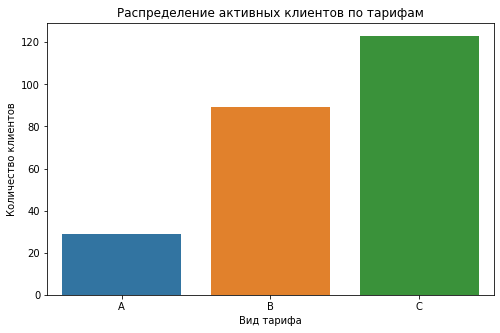

In [53]:
plt.figure(figsize=(8, 5))
sns.barplot(data=atu, x='tariff_plan', y='user_id')\
.set(title='Распределение активных клиентов по тарифам', xlabel='Вид тарифа', ylabel='Количество клиентов')
plt.show()

Посмотрим расчет затрат для каждого активного клиента за каждый месяц с сентября по ноябрь.

Но сначала выгрузим в таблице рассчеты по всем клиентам и посмотрим их распредение и среднее.

In [54]:
expenditure = active_clients.pivot_table(index=['user_id','month'],
                             values=['total_revenue', 'internal_revenue'],
                             aggfunc={'total_revenue':'sum', 'internal_revenue':'first'})\
.sort_values(by='total_revenue', ascending=False).reset_index()
expenditure.head(5) 

,user_id,month,internal_revenue,total_revenue
0,166582,9,0.0,22627.958
1,168361,11,0.0,21441.861
2,166582,10,0.0,20937.142
3,168252,11,0.0,12249.573
4,166658,9,0.0,10326.930


In [55]:
expenditure.describe()

,user_id,month,internal_revenue,total_revenue
count,594.000000,594.000000,594.000000,594.000000
mean,167369.328283,10.185185,0.944667,2689.474667
std,596.572853,0.770044,6.190273,1993.236370
min,166377.000000,9.000000,0.000000,1000.000000
25%,166880.250000,10.000000,0.000000,1604.317250
50%,167272.000000,10.000000,0.000000,2171.147500
75%,167908.000000,11.000000,0.000000,3146.968750
max,168606.000000,11.000000,87.927000,22627.958000


Мы видим, что исходящих звонков внутри сети сверх лимита нет, все клиенты укладываюся в установленное время.

In [56]:
des11 = expenditure.query('month == 11')
des11['total_revenue'].describe()

count      241.000000
mean      2772.577701
std       1975.807723
min       1000.000000
25%       1629.106000
50%       2266.335000
75%       3273.005000
max      21441.861000
Name: total_revenue, dtype: float64

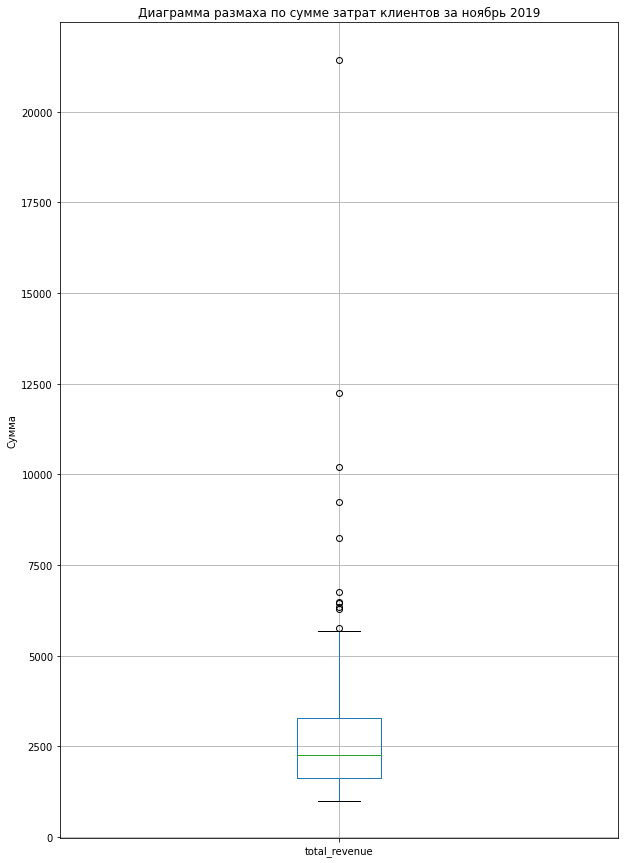

In [57]:
plt.figure(figsize=(10,15))
des11.boxplot('total_revenue')
plt.title(label='Диаграмма размаха по cумме затрат клиентов за ноябрь 2019')
plt.ylabel("Сумма")
plt.show()

In [58]:
des10 = expenditure.query('month == 10')
des10['total_revenue'].describe()

count      222.000000
mean      2635.484680
std       1903.451731
min       1000.000000
25%       1560.325000
50%       2158.903500
75%       3170.767500
max      20937.142000
Name: total_revenue, dtype: float64

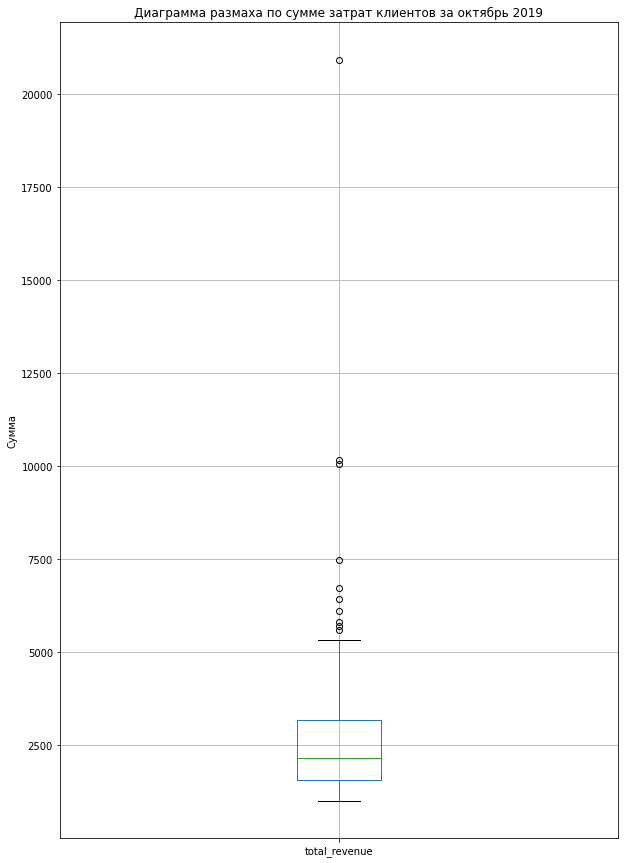

In [59]:
plt.figure(figsize=(10,15))
des10.boxplot('total_revenue')
plt.title(label='Диаграмма размаха по cумме затрат клиентов за октябрь 2019')
plt.ylabel("Сумма")
plt.show()

In [60]:
des9 = expenditure.query('month == 9')
des9['total_revenue'].describe()

count      131.000000
mean      2628.084939
std       2176.007879
min       1000.000000
25%       1610.226000
50%       2164.165000
75%       2967.612500
max      22627.958000
Name: total_revenue, dtype: float64

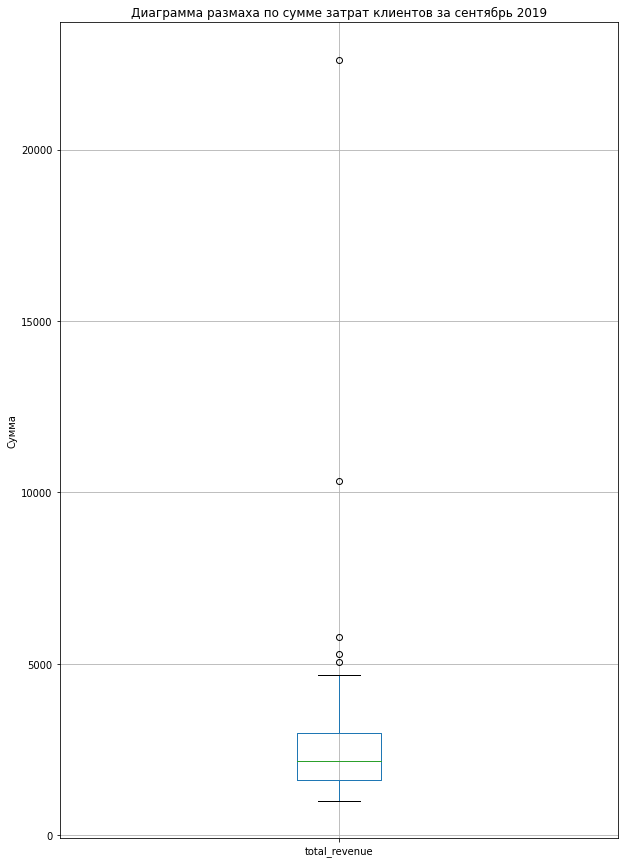

In [61]:
plt.figure(figsize=(10,15))
des9.boxplot('total_revenue')
plt.title(label='Диаграмма размаха по cумме затрат клиентов за сентябрь 2019')
plt.ylabel("Сумма")
plt.show()

По диаграммам размаха вы видим, что средняя сумма трат сентября составляет примерно 2628.08, октября примерно 2635.48, ноября примерно 2772.58. Большинсто клиентов тратит до 5 000 в месяц, но есть и те, кто любит поговорить и из затраты составляют более 20 000 в месяц.

Выберем 30 самых активных из активных клиентов и на их примере посмотрим по ним димаку на графике.))

In [62]:
expenditure = expenditure.head(30)

<function matplotlib.pyplot.show(close=None, block=None)>

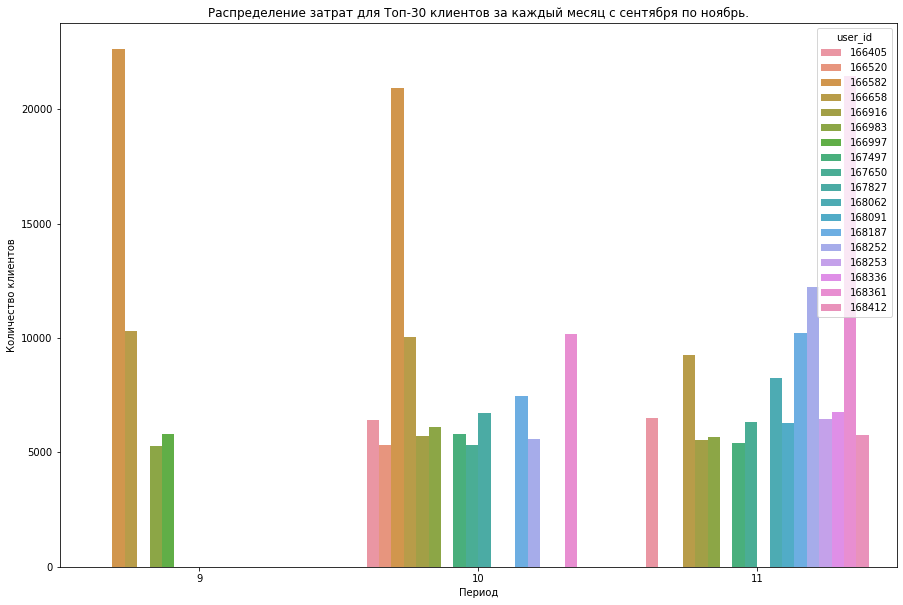

In [63]:
plt.figure(figsize=(15, 10))
sns.barplot(x='month', y='total_revenue', hue='user_id', data=expenditure)\
.set(title='Распределение затрат для Топ-30 клиентов за каждый месяц с сентября по ноябрь.'
     , xlabel='Период',
     ylabel='Количество клиентов')
plt.show

По графику видно, что большая часть актиыных клиентов по выборке оплачивали услуги телеком оператора в ноябре, а в сентбре из активных клиентов ноября почти никто не работал.

## Средняя длительность звонка без учёта времени ожидания по каждому клиенту

In [64]:
active_clients['mean_call_duration'] = active_clients['call_duration'] / active_clients['calls_count']
active_clients

/tmp/ipykernel_109/962301304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_clients['mean_call_duration'] = active_clients['call_duration'] / active_clients['calls_count']


,month,user_id,operator_count,min_over_limit,min_external,tariff_plan,call_duration,total_call_duration,calls_count,cost,cost_within_call_over(р/мин),cost_external_calls(р/мин),operator_cost,within_call_free(min),internal_revenue,external_revenue,operator_revenue,revenue,total_revenue,mean_call_duration
0,9,166377,4,0.00,1451.21,B,1451.21,1796.86,1452,2000,0.15,0.5,150,500,0.000,725.605,600,1325.605,3325.605,0.999456
1,9,167180,3,0.18,157.88,C,158.06,184.43,117,1000,0.30,0.7,300,0,0.054,110.516,900,1010.570,2010.570,1.350940
2,9,167185,1,0.00,28.57,A,28.57,39.21,65,4000,0.10,0.3,50,2000,0.000,8.571,50,58.571,4058.571,0.439538
3,9,167188,12,3.69,106.74,C,110.43,153.72,177,1000,0.30,0.7,300,0,1.107,74.718,3600,3675.825,4675.825,0.623898
5,9,167199,1,0.00,61.11,C,61.11,69.74,126,1000,0.30,0.7,300,0,0.000,42.777,300,342.777,1342.777,0.485000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,11,167158,1,0.00,43.72,A,43.72,72.72,219,4000,0.10,0.3,50,2000,0.000,13.116,50,63.116,4063.116,0.199635
702,11,167172,3,0.00,272.85,B,272.85,320.27,182,2000,0.15,0.5,150,500,0.000,136.425,450,586.425,2586.425,1.499176
703,11,167175,2,0.00,786.77,B,786.77,988.82,734,2000,0.15,0.5,150,500,0.000,393.385,300,693.385,2693.385,1.071894
704,11,167176,8,0.00,391.67,B,628.02,728.30,638,2000,0.15,0.5,150,500,0.000,195.835,1200,1395.835,3395.835,0.984357


In [65]:
mean_call_duration = active_clients.groupby('user_id').agg({'mean_call_duration':'mean'})\
.sort_values(by='mean_call_duration', ascending=False).reset_index()
mean_call_duration.head(5)

,user_id,mean_call_duration
0,167455,6.855971
1,167534,3.165515
2,168606,3.148519
3,166658,3.138038
4,167272,3.055411


<AxesSubplot:xlabel='user_id'>

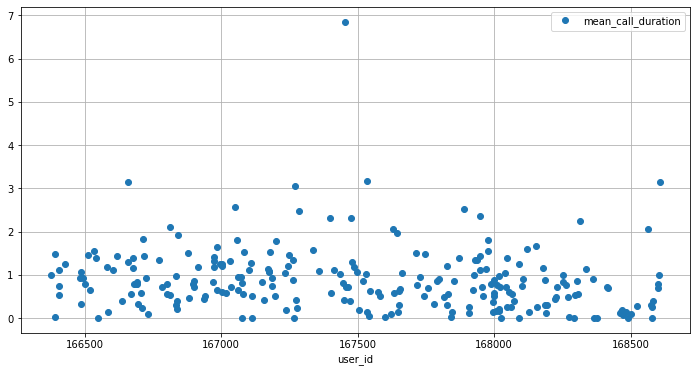

In [66]:
mean_call_duration.plot(x='user_id',y='mean_call_duration',style='o',grid=True,figsize=(12, 6)) 

In [67]:
mean_call_duration.describe()

,user_id,mean_call_duration
count,241.000000,241.000000
mean,167498.348548,0.882275
std,627.623085,0.739238
min,166377.000000,0.000000
25%,166975.000000,0.403827
50%,167506.000000,0.776356
75%,168018.000000,1.182585
max,168606.000000,6.855971


По графику видим, что больше 50% звонков в среднем не длятся даже 1 мин. У 25 % клиентов звонкоки дляться примерно 40 секунд, возможно очень много недозвонов. У оставшихся 25% звоки дляться в среднем чуть больше 1 мин. В среднем самый длинный звонок длится чуть меньше 7 мин.

## Проверить количество внутренних и внешних вызовов на каждого оператора

In [68]:
acte_lient = activ.query('user_id in @clients')
acte_lient.head(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,...,cost,cost_within_call_over(р/мин),cost_external_calls(р/мин),operator_cost,within_call_free(min),operator_count,min_over_limit,min_external,day,day_week
0,166377,2019-09-02,in,False,880028.0,False,2,1.10,1.25,B,...,2000,0.15,0.5,150,500,5,0.0,1.10,0,Выходной день
1,166377,2019-09-02,in,False,880026.0,False,1,0.52,0.57,B,...,2000,0.15,0.5,150,500,5,0.0,0.52,0,Выходной день
2,166377,2019-09-02,out,False,880026.0,False,16,30.88,33.05,B,...,2000,0.15,0.5,150,500,5,0.0,30.88,0,Выходной день
3,166377,2019-09-02,out,False,880026.0,True,6,0.00,2.80,B,...,2000,0.15,0.5,150,500,5,0.0,0.00,0,Выходной день
4,166377,2019-09-02,out,False,880028.0,False,20,42.15,44.78,B,...,2000,0.15,0.5,150,500,5,0.0,42.15,0,Выходной день


In [69]:
io = acte_lient.groupby(['internal']).agg({'calls_count': 'sum', 'operator_id': 'nunique'})\
.sort_values(by='calls_count', ascending=True).reset_index()
io

,internal,calls_count,operator_id
0,True,14118,515
1,False,613550,883


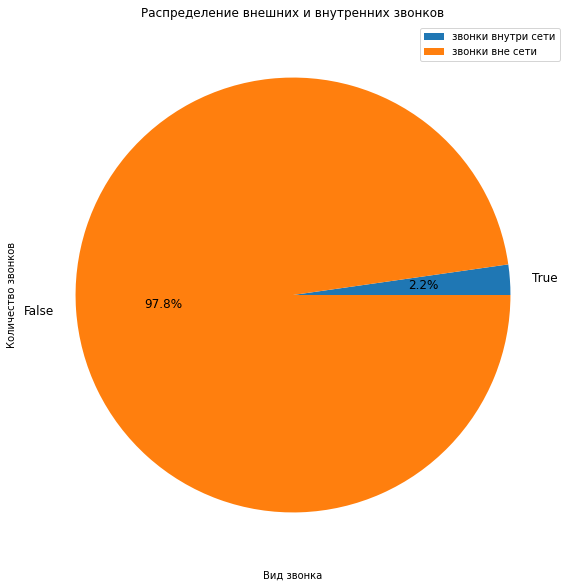

In [70]:
io.plot.pie(y = 'calls_count',
              figsize = (10,10),
              labels=io['internal'],
              legend = False,
              fontsize=12,
              autopct='%1.1f%%')
plt.title('Распределение внешних и внутренних звонков')
plt.xlabel('Вид звонка') 
plt.ylabel('Количество звонков')
plt.legend(labels=['звонки внутри сети','звонки вне сети'])

Внутри сети звонков почти нет, всего 2,2%, зато внешних звонков 97.8%. 

## Проверить количества вызовов по дням недели

Создадим таблицу с количеством звонков по дням недели и определим был ли день будним или выходным, какое соотношение звонков по будним дням к выхолным. Будем считать по столбцу total_call_duration, т.к. нам надо будет учитывать звонки, даже если был недозвон.

In [71]:
days_call = acte_lient.groupby('date').agg({'day_week':'first','total_call_duration': 'count'}).\
sort_values(by='total_call_duration', ascending=True).reset_index()
days_call.head(5)

,date,day_week,total_call_duration
0,2019-09-01,Выходной день,43
1,2019-09-08,Выходной день,58
2,2019-09-07,Будний день,62
3,2019-09-15,Выходной день,69
4,2019-09-14,Будний день,80


Посмотрим распредедение количества звонков.

In [72]:
days_week = days_call.groupby('day_week').agg({'total_call_duration': 'count'}).\
sort_values(by='total_call_duration', ascending=True).reset_index()
days_week

,day_week,total_call_duration
0,Выходной день,26
1,Будний день,63


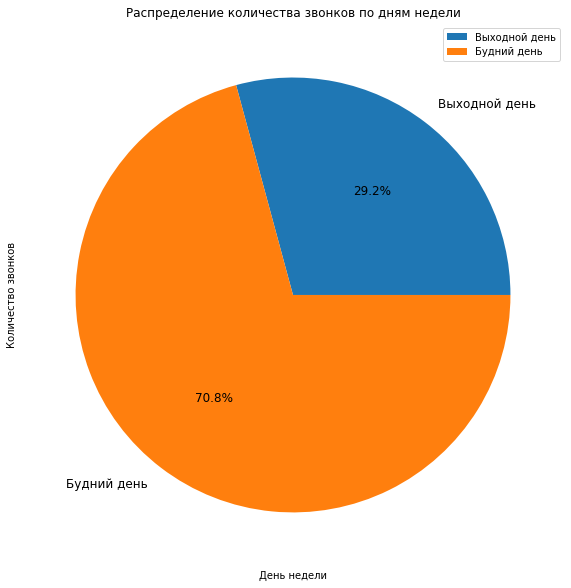

In [73]:
days_week.plot.pie(y = 'total_call_duration',
              figsize = (10,10),
              labels= days_week['day_week'],
              legend = False,
              fontsize=12,
              autopct='%1.1f%%')
plt.title('Распределение количества звонков по дням недели')
plt.xlabel('День недели') 
plt.ylabel('Количество звонков')
plt.legend(labels=['Выходной день','Будний день'])

По графику видно, что большинство звонков операторы делают в будние дни 70,8%, хотя и для выходных % звонков не маленький, почти 29,2%

## Посмотреть распределение соотношения количества входящих и исходящих вызовов

In [75]:
do = acte_lient.groupby(['direction']).agg({'calls_count': 'sum', 'operator_id': 'nunique'})\
.sort_values(by='calls_count', ascending=True).reset_index()
do

,direction,calls_count,operator_id
0,in,159454,671
1,out,468214,742


<function matplotlib.pyplot.show(close=None, block=None)>

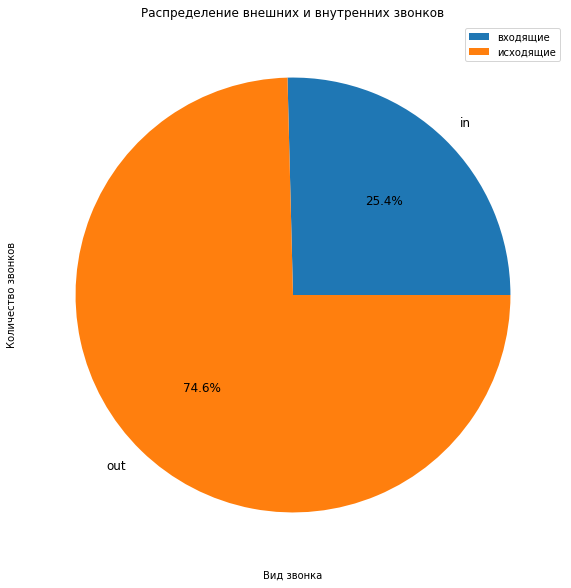

In [76]:
do.plot.pie(y = 'calls_count',
              figsize = (10,10),
              labels=do['direction'],
              legend = False,
              fontsize=12,
              autopct='%1.1f%%')
plt.title('Распределение внешних и внутренних звонков')
plt.xlabel('Вид звонка') 
plt.ylabel('Количество звонков')
plt.legend(labels=['входящие','исходящие'])
plt.show

Большинство звонков 74.6 % - исходящие, входящих звонков крайне мало 25.4%. Колценты работают и бизнес должен предлагать свои услуги, так что в таком распределении нет ничего удивительного.

## Рассчитать текущую выручку компании

Будем использовать таблицу activ_revenue, т.к. выручку телеком компания получает не только с активных, но и не активных клиентов.

Расчитаем сколько всего средств получила телеком компания за 3 месяца по всем клиентам. 

In [77]:
total_all_cost_month = activ_revenue.groupby(['month']).agg({'total_revenue': 'sum'})\
.sort_values(by='month', ascending=True).reset_index()
total_all_cost_month

,month,total_revenue
0,9,445389.696
1,10,703264.446
2,11,701675.225


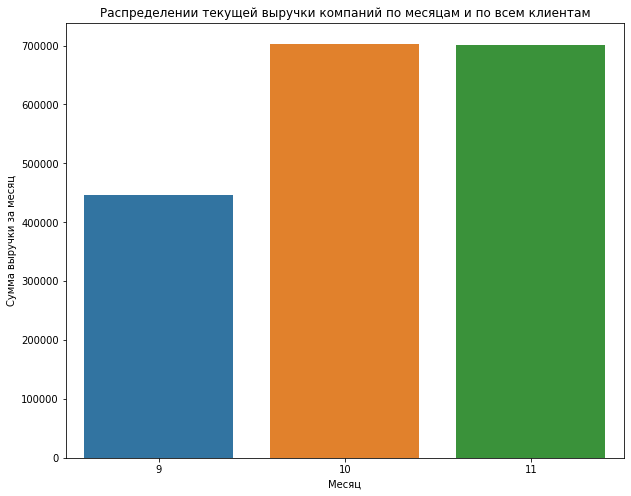

In [78]:
plt.figure(figsize=(10, 8)) 
ax = sns.barplot(x='month', y='total_revenue', data = total_all_cost_month) 
ax.set_title('Распределении текущей выручки компаний по месяцам и по всем клиентам')
ax.set_xlabel('Месяц') 
ax.set_ylabel('Сумма выручки за месяц')
plt.show()

По графику видим, что самая большая сумма прибыли в размере 703 264.446 у телеком компании получилась в октябре 2019. В ноябре выручка немного отстает и состаляет - 701 675.225. В сентябре самая маленька выручка, всего 445 389.696.


Расчитаем сколько всего средств получила телеком компания за 3 месяца только по активным клиентам.

In [79]:
total_activ_cost_month = active_clients.groupby(['month']).agg({'total_revenue': 'sum'})\
.sort_values(by='month', ascending=True).reset_index()
total_activ_cost_month

,month,total_revenue
0,9,344279.127
1,10,585077.599
2,11,668191.226


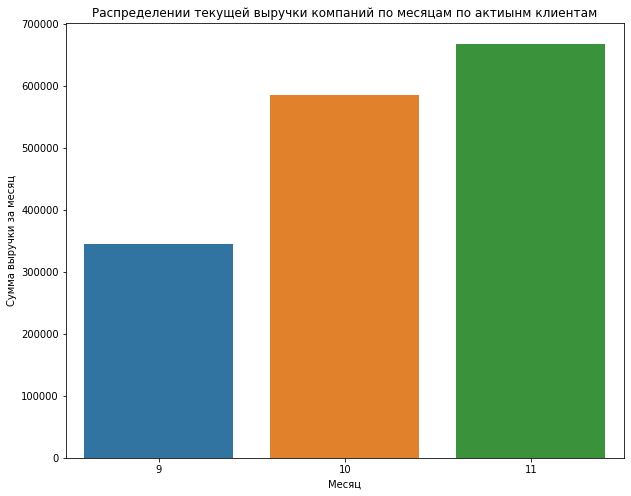

In [80]:
plt.figure(figsize=(10, 8)) 
ax = sns.barplot(x='month', y='total_revenue', data = total_activ_cost_month) 
ax.set_title('Распределении текущей выручки компаний по месяцам по актиынм клиентам')
ax.set_xlabel('Месяц') 
ax.set_ylabel('Сумма выручки за месяц')
plt.show()

В этом графике мы выдим распределение только по активным клиентам. В ноябре выручка равняется 668 191.226. В октяре выручка уже гораздо ниже - 585 077.599. В сентябре выручка по аквтивным клиентам составляет 344 279.127.

 Посчитаем сумму выручки по неактивным клиентам.

In [81]:
not_active_clients = total_all_cost_month.merge(total_activ_cost_month, on='month', how='left')\
.rename(columns={'total_revenue_x':'total_revenue','total_revenue_y': 'total_revenue_activ'})
not_active_clients['total_revenue_not_activ'] = not_active_clients['total_revenue'] - not_active_clients['total_revenue_activ']
not_active_clients

,month,total_revenue,total_revenue_activ,total_revenue_not_activ
0,9,445389.696,344279.127,101110.569
1,10,703264.446,585077.599,118186.847
2,11,701675.225,668191.226,33483.999


In [82]:
not_active_clients['total_revenue_not_activ'].sum()

252781.41500000027

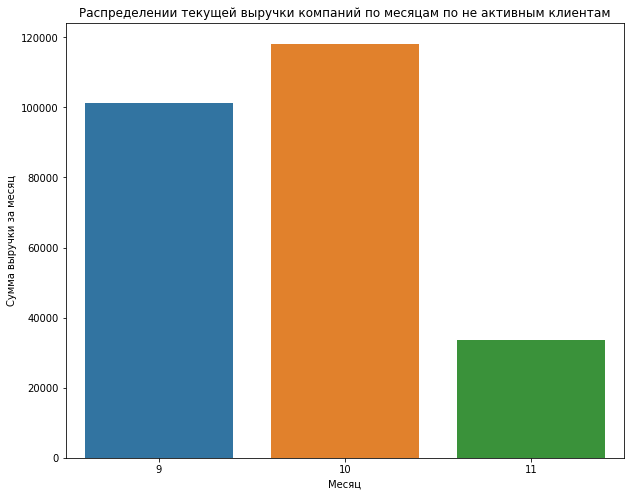

In [83]:
plt.figure(figsize=(10, 8)) 
ax = sns.barplot(x='month', y='total_revenue_not_activ', data = not_active_clients) 
ax.set_title('Распределении текущей выручки компаний по месяцам по не активным клиентам')
ax.set_xlabel('Месяц') 
ax.set_ylabel('Сумма выручки за месяц')
plt.show()

По данным видно, что в октябре и сентябре был большой отток клиентов.
В сентябре выручка неактивных клиентов составляет 101 110.569, в октябре 118 186.847, а в ноябре 33 483.999. Но и получение выручки за 3 месяца с неактивных клиентов в размере 252781.42 тоже не плохо, но лучще бы перевести их в разряд активных)

## Изучить выручку после перевода активных клиентов на оптимальные тарифы

Для начала посмотрим сколько активных клиентов находяится на каждом из тарифов.

In [84]:
act_tarif = activ_revenue.groupby('tariff_plan').agg({'user_id':'nunique'})
act_tarif

,user_id
tariff_plan,
A,34
B,110
C,159


Активные клиенты распределились по тарифам так: на С подключено 159 клиентов, на В - 110, на А -34. 

Чтобы понять оптимальность тарифов клиениктов, необходимо посчитать переплачивает клиент или нет.

Посчитаем, сколько платили бы клиенты, если находились на каждом из тарифов.

In [85]:
active_clients['tariff_A'] = (tariffics.loc[0,'cost_within_call_over(р/мин)'] * active_clients['min_over_limit'])\
+ (tariffics.loc[0,'cost_external_calls(р/мин)'] * active_clients['min_external']) +active_clients['operator_revenue'] + tariffics.loc[0,'cost']


/tmp/ipykernel_109/3080166977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_clients['tariff_A'] = (tariffics.loc[0,'cost_within_call_over(р/мин)'] * active_clients['min_over_limit'])\


In [86]:
active_clients['tariff_B'] = (tariffics.loc[1,'cost_within_call_over(р/мин)'] * active_clients['min_over_limit'])\
+ (tariffics.loc[1,'cost_external_calls(р/мин)'] * active_clients['min_external'])\
+ active_clients['operator_revenue']+tariffics.loc[1,'cost']



/tmp/ipykernel_109/4017630801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_clients['tariff_B'] = (tariffics.loc[1,'cost_within_call_over(р/мин)'] * active_clients['min_over_limit'])\


In [87]:
active_clients['tariff_C'] = (tariffics.loc[2,'cost_within_call_over(р/мин)'] * active_clients['min_over_limit'])\
+ (tariffics.loc[2,'cost_external_calls(р/мин)'] * active_clients['min_external']) + active_clients['operator_revenue']
active_clients.head(5)


/tmp/ipykernel_109/123604101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_clients['tariff_C'] = (tariffics.loc[2,'cost_within_call_over(р/мин)'] * active_clients['min_over_limit'])\


,month,user_id,operator_count,min_over_limit,min_external,tariff_plan,call_duration,total_call_duration,calls_count,cost,...,within_call_free(min),internal_revenue,external_revenue,operator_revenue,revenue,total_revenue,mean_call_duration,tariff_A,tariff_B,tariff_C
0,9,166377,4,0.00,1451.21,B,1451.21,1796.86,1452,2000,...,500,0.000,725.605,600,1325.605,3325.605,0.999456,5035.363,3325.6050,1615.847
1,9,167180,3,0.18,157.88,C,158.06,184.43,117,1000,...,0,0.054,110.516,900,1010.570,2010.570,1.350940,4947.382,2978.9670,1010.570
2,9,167185,1,0.00,28.57,A,28.57,39.21,65,4000,...,2000,0.000,8.571,50,58.571,4058.571,0.439538,4058.571,2064.2850,69.999
3,9,167188,12,3.69,106.74,C,110.43,153.72,177,1000,...,0,1.107,74.718,3600,3675.825,4675.825,0.623898,7632.391,5653.9235,3675.825
5,9,167199,1,0.00,61.11,C,61.11,69.74,126,1000,...,0,0.000,42.777,300,342.777,1342.777,0.485000,4318.333,2330.5550,342.777


Сделаем отдельную таблицу, чтобы было удобней ориентироваться 

In [88]:
tariff_activ = active_clients.pivot_table(index=['user_id', 'tariff_plan', 'cost'], values=['revenue', 'tariff_A', 'tariff_B', 'tariff_C'],\
                                          aggfunc={'revenue':'sum', 'tariff_A':'sum', 'tariff_B':'sum', 'tariff_C':'sum'}).reset_index() 

tariff_activ.head(5)

,user_id,tariff_plan,cost,revenue,tariff_A,tariff_B,tariff_C
0,166377,B,2000,4046.600,15207.960,10046.600,4885.240
1,166391,C,1000,600.203,12600.087,6600.145,600.203
2,166392,C,1000,1993.375,13882.875,7938.125,1993.375
3,166405,B,2000,11967.865,20500.719,17967.865,15435.011
4,166406,B,2000,2491.620,13854.972,8491.620,3128.268


Отфильтруем клиентов, которые переплачивают

In [89]:
us_overpayment = tariff_activ.query('revenue < tariff_A or revenue < tariff_B or revenue < tariff_C')
us_overpayment.head(5)


,user_id,tariff_plan,cost,revenue,tariff_A,tariff_B,tariff_C
0,166377,B,2000,4046.600,15207.960,10046.600,4885.240
1,166391,C,1000,600.203,12600.087,6600.145,600.203
2,166392,C,1000,1993.375,13882.875,7938.125,1993.375
3,166405,B,2000,11967.865,20500.719,17967.865,15435.011
4,166406,B,2000,2491.620,13854.972,8491.620,3128.268


In [90]:
print('Переплачивают за свой тариф -',us_overpayment['user_id'].nunique(), 'клиент')

Переплачивают за свой тариф - 241 клиент


Напишем функцию,которая определит оптимальность тарифа.

In [91]:
def choose_tf(dt):
    if dt['tariff_A'] < dt['tariff_B'] < dt['tariff_C']:
        return 'A'
    elif dt['tariff_A'] > dt['tariff_B'] < dt['tariff_C']:
        return 'B'
    elif dt['tariff_A'] > dt['tariff_B'] > dt['tariff_C']:
        return 'C'

In [92]:
us_overpayment['opt_tariff'] = us_overpayment.apply(choose_tf, axis=1)
us_overpayment.head(5)

,user_id,tariff_plan,cost,revenue,tariff_A,tariff_B,tariff_C,opt_tariff
0,166377,B,2000,4046.600,15207.960,10046.600,4885.240,C
1,166391,C,1000,600.203,12600.087,6600.145,600.203,C
2,166392,C,1000,1993.375,13882.875,7938.125,1993.375,C
3,166405,B,2000,11967.865,20500.719,17967.865,15435.011,C
4,166406,B,2000,2491.620,13854.972,8491.620,3128.268,C


In [93]:
us_overpayment.query('opt_tariff == "C"')

,user_id,tariff_plan,cost,revenue,tariff_A,tariff_B,tariff_C,opt_tariff
0,166377,B,2000,4046.600,15207.960,10046.6000,4885.240,C
1,166391,C,1000,600.203,12600.087,6600.1450,600.203,C
2,166392,C,1000,1993.375,13882.875,7938.1250,1993.375,C
3,166405,B,2000,11967.865,20500.719,17967.8650,15435.011,C
4,166406,B,2000,2491.620,13854.972,8491.6200,3128.268,C
...,...,...,...,...,...,...,...,...
236,168583,B,2000,457.655,8454.593,4457.6550,460.717,C
237,168598,C,1000,348.832,4320.928,2334.8800,348.832,C
238,168601,C,1000,981.199,4763.371,2872.2850,981.199,C
239,168603,B,2000,157.540,4154.524,2157.5400,160.556,C


In [94]:
us_overpayment.query('opt_tariff == "B"')

,user_id,tariff_plan,cost,revenue,tariff_A,tariff_B,tariff_C,opt_tariff


In [95]:
us_overpayment.query('opt_tariff == "A"')

,user_id,tariff_plan,cost,revenue,tariff_A,tariff_B,tariff_C,opt_tariff
17,166582,A,4000,36004.758,48004.758,65807.930,83611.102,A
22,166658,B,2000,23611.545,28926.927,29611.545,30296.163,A
208,168252,A,4000,9841.130,17841.130,19068.550,20295.970,A
219,168361,A,4000,23602.779,31602.779,41737.965,51873.151,A


Большинсвту клиентов будет выгоден тариф С, но есть 4 клиента, которым был бы выгодет тариф А, их траты очень высоки. У 3х из 4 и так уже установлен тариф А, а одному из них возможно стоит сменить его.

Посчитаем какая сумму трат активных клиентов на оптимальном тарифе.

In [96]:
def optimal_cost(row):
    opt_tariff = min(row[3], row[4], row[5])
    return opt_tariff

In [97]:
us_overpayment['optimal_cost'] = us_overpayment.apply(optimal_cost, axis=1)
us_overpayment.head()

,user_id,tariff_plan,cost,revenue,tariff_A,tariff_B,tariff_C,opt_tariff,optimal_cost
0,166377,B,2000,4046.600,15207.960,10046.600,4885.240,C,4046.600
1,166391,C,1000,600.203,12600.087,6600.145,600.203,C,600.203
2,166392,C,1000,1993.375,13882.875,7938.125,1993.375,C,1993.375
3,166405,B,2000,11967.865,20500.719,17967.865,15435.011,C,11967.865
4,166406,B,2000,2491.620,13854.972,8491.620,3128.268,C,2491.620


Посчитаем сумму переплаты по сравнению с оптимальным тарифом.

In [98]:
def overpayment(row):
    over = row[6]-row[8]
    return over
us_overpayment['overpayment'] = us_overpayment.apply(overpayment, axis=1)
us_overpayment.head(5)

,user_id,tariff_plan,cost,revenue,tariff_A,tariff_B,tariff_C,opt_tariff,optimal_cost,overpayment
0,166377,B,2000,4046.600,15207.960,10046.600,4885.240,C,4046.600,838.640
1,166391,C,1000,600.203,12600.087,6600.145,600.203,C,600.203,0.000
2,166392,C,1000,1993.375,13882.875,7938.125,1993.375,C,1993.375,0.000
3,166405,B,2000,11967.865,20500.719,17967.865,15435.011,C,11967.865,3467.146
4,166406,B,2000,2491.620,13854.972,8491.620,3128.268,C,2491.620,636.648


Посчитаем суммы переплат по тарифам А и В.

In [99]:
overpay_AB = us_overpayment[us_overpayment['overpayment']!=0]
overpay_AB.head(5) 

,user_id,tariff_plan,cost,revenue,tariff_A,tariff_B,tariff_C,opt_tariff,optimal_cost,overpayment
0,166377,B,2000,4046.600,15207.960,10046.600,4885.240,C,4046.600,838.640
3,166405,B,2000,11967.865,20500.719,17967.865,15435.011,C,11967.865,3467.146
4,166406,B,2000,2491.620,13854.972,8491.620,3128.268,C,2491.620,636.648
5,166407,A,4000,1243.391,13243.391,7338.985,1434.579,C,1243.391,191.188
6,166428,B,2000,835.755,12801.453,6835.755,870.057,C,835.755,34.302


In [100]:
overpay_tafifAB = overpay_AB.groupby('tariff_plan').agg({'overpayment':'sum'})
overpay_tafifAB

,overpayment
tariff_plan,
A,111219.44
B,29635.21


Можно сделать вывод, что оптимально используют тариф только обладатели тарифа С и 3х клиентов с тарифом А, остальные переплачивают. Мы уже выясняли ранее, что звонков внутри сети крайне мало, а операторы звонят в основном вне сети.

Посчитаем сумму дохода компании, если бы все перешли на оптимальный тариф.

In [101]:
optional_sum = us_overpayment['optimal_cost'].sum()
print('Сумма дохода компании по оптимальным тарифам составляет', optional_sum )

Сумма дохода компании по оптимальным тарифам составляет 567547.952


In [102]:
print('Сумма дохода компании по действующим тарифам составляет', not_active_clients['total_revenue_activ'].sum())

Сумма дохода компании по действующим тарифам составляет 1597547.9519999991


In [103]:
not_active_clients['total_revenue_activ'].sum() - optional_sum #сумма убытка

1029999.9999999991

Разница очевидна. На оптимальных тарифах доход составляет 567 547.95, а на действующих 1 597 547.95. Владельцы оператора "Ну Позвони" могут недосчитаться 1 029 999.99 - это довольно-таки крупная сумма и лишиться ее будет большой потерей для компании.

Выводы:
    
Был проведен исследовательский анализ данных. Выявлено, что период начала выборки 2019-08-02 и период окончания 2019-11-28, но активными клиентами будем считать тех, кто работал последние 10 рабочих дней в ноябре 2019 и уменьшим период выборки до 3х месяцев, т.е будем рассматривать период с 2019-09 по 2019-08. Во всем датасете представлено 307 клиентов из них 78.5% активных. С сентября по ноябрь 2019 было сделано от 1 до 4817 звонков. В среднем за 3 месяца операторы звонили и получали всего 399 звонков. Среди операторов есть трудоголики, звонят более 1000 раз 

Больше всего клиентов подключено к тарифу С - 159 компаний, к тарифу В чуть меньше - 110 компаний, самым не попуоярным является тариф А - 34 компании. Возможно такое распредение связано с абонентской платой и с вхолящими в стоимость только внутренними звонками, которыми пользуются в основном только опетаторы при переговорах между собой и клиентам невыгодно платить еще и за эти звонки. 
Для высчисления сумм переплат были выведены следующие показатели:

- количество минут израсходованных сверх лимита тарифа внутри сети
- количество минут израсходованных на разговоры вне сети
- количество уникальных операторов
- стоимость исходящих звонков внутри сети сверх лимита
- стоимость исходящих звонков вне сети
- опалата за операторов
- сумма переплаты
- общая сумма оплаты за месяц


Были выявлены user_id активных клиентов, которые совершали звонки в течении выбранных 3х месяцев и приносили прибыть телеком компании. Большая часть активных клиентов по выборке оплачивали услуги телеком оператора в ноябре, а в сентбре из активных клиентов ноября почти никто не работал.

Ведя рассчеты по данным клиентам мы увидели, что исходящих звонков внутри сети сверх лимита нет, все клиенты укладываюся в установленное время, входящее в стоимость каждого тарифа. Средняя сумма трат сентября составляет примерно 2628.08, октября примерно 2635.48, ноября примерно 2772.58. Большинсто клиентов тратит до 5 000 в месяц, но есть и те, кто любит поговорить и из затраты составляют более 20 000 в месяц.

Внутри сети звонков почти нет, всего 2,2%, зато внешних звонков 97.8%. Большинство звонков 74.6 % - исходящие, входящих звонков крайне мало 25.4%. Кол-центы работают и бизнес должен предлагать свои услуги, так что в таком распределении нет ничего удивительного. Основные звонки операторы делают в будние дни 70,8%, хотя и для выходных % звонков не маленький, почти 29,2%. Больше 50% звонков в среднем не длятся даже 1 мин. У 25 % клиентов звонкоки дляться примерно 40 секунд, возможно очень много недозвонов. У оставшихся 25% звоки дляться в среднем чуть больше 1 мин. В среднем самый длинный звонок длится чуть меньше 7 мин. 

Рассматривая данные по всем клиентам (активным и неактивным), то можно сделать вывод, что самая большая сумма прибыли в размере 703 264.446 у телеком компании получилась в октябре 2019. В ноябре выручка немного отстает и состаляет - 701 675.225. В сентябре самая маленька выручка, всего 445 389.696. Если брать на рассмотрение выборку только с активными клиентами, то мы увидели, что в ноябре выручка равняется 668 191.226. В октяре выручка уже гораздо ниже - 585 077.599. В сентябре выручка по аквтивным клиентам составляет 344 279.127. Рассматривать выборку по неактивным клиентам, мы увидели -  в октябре и сентябре был большой отток клиентов. В сентябре выручка неактивных клиентов составляет 101 110.569, в октябре 118 186.847, а в ноябре 33 483.999. Но и получение выручки за 3 месяца с неактивных клиентов в размере 252781.42 тоже не плохо, но лучще бы перевести их в разряд активных)

Еще было проведено исследование по выявлению оптимальности тарифов клиениктов и посчитали переплачивают клиенты или нет. Активные клиенты распределились по тарифам так: на С подключено 159 клиентов, на В - 110, на А - 34.Мы посчитали сколько платили бы клиенты, если находились на каждом из тарифов. Определили что всем клиентам будет выгоден тариф "С", но есть 4 клиента, которым был бы выгодет тариф А, их траты очень высоки. У 3х из 4 и так уже установлен тариф А, а одному из них возможно стоит сменить его. Остальным пользователи тарифов "А" и "В" будут всегда переплачивать. Получается, что Тарифный план "А" оптимально используют только 3 клиента, а 31 предлагается перейти на тариф "С". В тарифе "В" все используют неоптимальный тариф и предлагается перейти только 1 клиенту на тариф "А", а остальным 109 на тариф "С". Но если всех клиентовперевести на оптимальные тарифы, то телеком оператор "Ну позвони" будет нести огромные убытки в размере 1 029 999.99. Поэтому необходимо дать рекомендации бизнесу для того, чтобы не потерять активных клиентов и не потерять в прибыли самим.

# Гипотезы

Гепотиза № 1

- 0 гипотеза: Средняя выручка активных клиетов до оптимизации равна средней выручке после оптимизации
- альтернативная гипотиза: Средняя выручка активных клиетов до оптимизации не равна средней выручке после оптимизации
 

Посчитаем средние значения сумм доходов по оптимальным тарифам и по по действующим тарифам.

In [104]:
alpha = 0.05 # критический уровень статистической значимости

results = st.mannwhitneyu(us_overpayment['optimal_cost'], not_active_clients['total_revenue_activ'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение:  0.002965269513903827
Отвергаем нулевую гипотезу


Альтернативная гипотиза была подтверждена - средняя выручка активных клиетов до оптимизации не равна средней выручке после оптимизации

Гипотеза № 2

* 0 гипотеза: Средняя выручка активных клиетов равна средней выручке неактичных клиентов
* альтернативная гипотиза: Средняя выручка активных клиетов выше средней выручке неактичных клиентов

Будем делать исследование по таблице not_active_clients.

In [105]:
not_active_clients

,month,total_revenue,total_revenue_activ,total_revenue_not_activ
0,9,445389.696,344279.127,101110.569
1,10,703264.446,585077.599,118186.847
2,11,701675.225,668191.226,33483.999


In [106]:
alpha = 0.05 # критический уровень статистической значимости

results = st.mannwhitneyu(not_active_clients['total_revenue_activ'], not_active_clients['total_revenue_not_activ'])

print('p-значение: ', results.pvalue)

if results.pvalue > alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение:  0.1
Отвергаем нулевую гипотезу


Вывод:
    
0 гипотеза  была подтверждена - средняя сумма выручки по активным клиетам выше, чем средняя сумма выручки по неактичным клиентам

# Выводы

Было проведено аналитическое исследование по данным телеком компании "Ну позвони", в результате которого мы ответили на следующие вопросы:
- определили активных клиентов
- нашли клиентов, которые неоптимально используют свои тарифные планы
- рассчитали текущую выручку компании
- изучили выручку после перевода активных клиентов на оптимальные тарифы
- посчитали среднюю длительность звонка без учёта времени ожидания по каждому клиенту
- проверили количество внутренних и внешних вызовов на каждого оператора
- проверили количества вызовов по дням
- поосмотрели распределение соотношения количества входящих и исходящих вызовов
- рассчитали текущую выручку компании
- изучили выручку после перевода активных клиентов на оптимальные тарифы

Протестистовали 2 гипотизы и пришли к выводам:
1. Средняя выручка активных клиетов не равна средней выручке после оптимизации
2. Средняя выручка активных клиетов выше средней выручке неактичных клиентов

Так же ответили на вопрос: как уменьшить риск падения выручки, если все клиенты перейдут на более выгодные тарифы?


Необходимо сделать акцент на крупных клиентов, которые приносят больше всего выручки и использующие тариф "А" и "В". Основные расходы эти клиенты несут на большое количество исходящих звонков и операторов. Снизить расходы клиентов на операторов и не потерять в прибыли позволит оптимизация тарифного плана, например:
- предложить крупным клиентам тарифа "В" перейти на тариф "А", на более привелегированный тариф
- в тарифе "А " включить в стоимость тарифа определенное количество бесплатных операторов, а при превышении лимита операторов взимать за каждого фиксированную плату
- убрать из тарифа входящий пакет звонков внутри оператора и брать плату с первой минуты, пакеты с минутами по всем тарифам неэффективны
- добавить в тариф пакет исходящих звонков и на несколько копеек увеличить стоимость за минуты вне пакета.

Тарифы "В" и "С" оставить как есть, чтобы небольшие компании могли платить за небольшое количество выговоренных минут. 
Так же можно предложить провести промоакции для этих тарифов, например, 1-2 месяца попробовать в работе тариф "А" за полцены и если им понравится тариф, то остаться на нем за полную стоимость. Так и выручку сохраним и лояльность клиентов. 


Ссылка на презентацию: https://drive.google.com/file/d/19bgvbPXTqn0IpdfeNrs3_uJSjI4hQqrb/view?usp=drive_link